Scalable Machine Learning in Python 
===================
with Scikit-Learn and Dask 
===============
**August 2018**

Ian Stokes-Rees [@ijstokes](http://twitter.com/ijstokes) 
[http://bit.ly/scaleml-dask-wkshp](http://bit.ly/scaleml-dask-wkshp)


<a href="http://dask.pydata.org" ><img src="http://dask.pydata.org/en/latest/_images/dask_stacked.svg"
 width=200 />
</a>

## Description

This hands-on 3 hour workshop will give participants an opportunity to explore [Dask](http://dask.pydata.org), a parallel computing framework for Python.  We will start with an overview of Dask and the problem it was designed to address, and then look at three exercises that demonstrate the Dask parallel wrappers for [Pandas](http://pandas.pydata.org), [NumPy](http://www.numpy.org), and [Scikit-Learn](http://www.scikit-learn.org).

<table>
<tr><td>
<a href="http://dask.pydata.org" ><img src="http://dask.pydata.org/en/latest/_images/dask_stacked.svg"
 width=200 />
</a>

</td>
<td>
<a href="http://scikit-learn.org/" ><img src="http://scikit-learn.org/stable/_images/scikit-learn-logo-notext.png"
 width=200 />
</a>
</td>
<td>
<a href="http://pandas.pydata.org" ><img src="http://people.math.sc.edu/etpalmer/Images/pandas_logo.png"
 width=200 />
</a>
<br/>
<a href="http://www.numpy.org" ><img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/82/Logo_of_NumPy.svg/1200px-Logo_of_NumPy.svg.png"
 width=200 />
</a>
</td></tr>
</table>

Presenter
--------

<table>

<tr><td>
<font size=+2><b>Ian Stokes-Rees</b> [@ijstokes](http://twitter.com/ijstokes)
<br/>[StokesRees.Ian@bcg.com](mailto:StokesRees.Ian@bcg.com)
<br/>
[http://about.me/ijstokes](http://about.me/ijstokes)
<br/>
[http://linkedin.com/in/ijstokes](http://linkedin.com/in/ijstokes)
<br/></font>
</td>
<td>
<a href="https://www.bcg.com/beyond-consulting/bcg-gamma/"><img src="http://image-src.bcg.com/Images/BCGGamma_FullColor-1230x660_tcm9-170581.png" width=400 />
</a>
</td></tr>
</table>

Acknowledgements
---------------
Adapted from material created by:
* [Matthew Rocklin](https://github.com/mrocklin)
* [Ben Zaitlen](https://github.com/quasiben)
* [Martin Durant](https://github.com/martindurant)
* [Tom Augspurger](https://github.com/TomAugspurger)
* [Min Ragan-Kelley](https://github.com/minrk)
* [Olivier Grisel](https://github.com/ogrisel)

In particular:
* [SciPy 2018 Dask Tutorial](https://github.com/martindurant/dask-tutorial-scipy-2018)
* [PyCon 2017 Parallel Data Analysis Tutorial](https://us.pycon.org/2017/schedule/presentation/189/)
* [Dask Tutorial](https://github.com/dask/dask-tutorial)
* [Dask Talk](http://matthewrocklin.com/slides/dask-short#)

Assets and Reference
-------------------
This presentation:
* Anaconda Cloud: https://anaconda.org/ijstokes/scaleml-dask-wkshp
* GitHub: https://github.com/ijstokes/scaleml-dask-wkshp

The material is based on the BSD-3 open source Dask project, which is included in the Anaconda Distribution:
* Docs: http://dask.pydata.org/
* GitHub: https://github.com/dask/dask
* Support: http://dask.pydata.org/en/latest/support.html

Setup
-----
* [Download Anaconda 5.2 for Python 3.6](http://continuum.io/downloads)

* Clone or download the GitHub repo for the workshop:
```bash
git clone https://github.com/ijstokes/scaleml-dask-wkshp.git
```

* Quick and dirty:
```bash
conda install dask=0.18.2 python-graphviz
# pray
```

* Clean: create a conda environment for the workshop:
```bash
conda update -n root conda
conda create -n dasktut anaconda=5.2 python=3.6
conda activate dasktut
conda install dask=0.18.2 python-graphviz
```

* If you use `virtualenv/pipenv` you're on your own

* In a pinch, use the [PanGeo Jupyter Hub](http://pangeo.pydata.org/) server

In [1]:
import dask
print(dask.__version__)

Graphviz (optional)
--------
Graphviz is used by Dask to produce graphical representations graphs in the notebook. It is an optional extra that you can install.

Although graphviz and it's python bindings are included in the provided environment, you need extra libraries for it to work on your system, and what you need depends on your OS

- **Linux:** get `graphviz` from your system package manager (`yum install graphviz`)
- **OSX:** install `graphviz` with brew/macports (`brew install graphviz`)
- **Windows:** install from https://graphviz.gitlab.io/_pages/Download/Download_windows.html, and
set your `PATH` to be able to find the installed executable (`set %PATH%=%PATH%;C:\path\to\graphviz`)

See the [graphviz documentation](https://graphviz.gitlab.io/download/) for further information. 

In [2]:
import graphviz
print(graphviz.__version__)

0.8.4


## Before we start

We need to get some data to work with.
We are going to generate some [fake stock data](https://github.com/mrocklin/fakestockdata) by adding a bunch of points between real stock data points. This will take a few minutes the first time we run it.

In [ ]:
# or do this from the command line with `python prep_data.py`
%run ./prep_data.py

This will take about 4-5 minutes to run, depending on conference WiFi and your disk speed.
It will require 5 GB of storage, but that is mostly for randomly generated data (no download)

NOTE: If you want to experiment with very large datasets edit the file and look for `def weather()` to generate a 17 GB `data/weather-big` data set.

## Introductions

*Introduce yourself to the people on either side of you*

There is only one of me, so you're going to need to rely on each other for help during exercises!

# Dask Benefits

* Out-of-the-box parallel data structures with parallel methods that have interfaces you're familiar with.  In particular, Dask-ified parallel versions of `numpy.ndarray` and `pandas.Dataframe`.
* Ability to wrap existing code and make it auto-magically parallel (this part is pretty amazing)
* Low level primitives so you can construct your own parallel data structures
* Low level primitives so you can construct your own parallel algorithms

## Exercise 1.1: Daskified parallel NumPy ndarray
Take 10 minutes to get setup and then run through these basic Dask operations to see how it provides data structures similar to a `numpy.array` or `pandas.dataframe`

In [3]:
import numpy as np

In [4]:
a = np.random.randint(size=(10,10), low=1, high=10)

In [5]:
a

array([[1, 2, 1, 7, 9, 2, 8, 8, 6, 3],
       [1, 4, 1, 2, 1, 3, 7, 3, 8, 3],
       [3, 7, 5, 3, 7, 8, 3, 8, 3, 9],
       [4, 8, 7, 2, 1, 1, 4, 5, 6, 2],
       [4, 8, 1, 6, 3, 7, 6, 1, 1, 9],
       [7, 6, 5, 8, 3, 8, 7, 1, 2, 8],
       [8, 8, 5, 3, 5, 1, 6, 4, 8, 9],
       [5, 3, 6, 7, 1, 1, 6, 7, 4, 3],
       [9, 3, 1, 3, 4, 4, 4, 2, 4, 1],
       [9, 8, 6, 8, 2, 2, 1, 9, 7, 9]])

In [6]:
a[3,7]

5

In [7]:
type(a)

numpy.ndarray

In [8]:
import dask.array as da
a = da.random.randint(size=(60,60), low=1, high=10, chunks=(20,20))

In [9]:
a

dask.array<randint, shape=(60, 60), dtype=int64, chunksize=(20, 20)>

In [10]:
type(a)

dask.array.core.Array

Dask does ***lazy evaluation*** so it is returning a reference to a delayed operation, not yet invoked

In [11]:
a[3,10]

dask.array<getitem, shape=(), dtype=int64, chunksize=()>

`.compute()` is required to actually get back the values

In [12]:
a[3,10].compute()

6

### Same story for vectors

In [13]:
a[3,15:25]

dask.array<getitem, shape=(10,), dtype=int64, chunksize=(5,)>

In [14]:
a[3,15:25].compute()

array([2, 8, 8, 3, 1, 7, 6, 5, 3, 1])

In [15]:
# or regions/matrix
a[3:5, 15:25]

dask.array<getitem, shape=(2, 10), dtype=int64, chunksize=(2, 5)>

In [16]:
a[3:5, 15:25].compute()

array([[2, 8, 8, 3, 1, 7, 6, 5, 3, 1],
       [4, 8, 3, 9, 7, 3, 7, 9, 3, 5]])

In [17]:
# Notice what type this gives you, once it is fully reified
b = a[3:5, 10:20].compute()

In [18]:
type(b)

numpy.ndarray

In [19]:
type(a[3:5, 15:25].compute())

numpy.ndarray

### ... and methods

In [20]:
a.mean()

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=()>

In [21]:
a.mean().compute()

5.0247222222222225

Why should I care that Dask looks like NumPy?
----------

This is just the `dask.array` interface, which is a parallel wrapper around NumPy `numpy.ndarray`, covering about 90% of its functionality.  The point is to warm you up to the idea that Dask can be used to provide parallel versions of data structures you are already familiar with.

"chunksize" parameter: how Dask breaks up an "ndarray" for parallel processing
----------------------
The `chunksize` parameter tells Dask how big to make each sub-unit of a `dask.array`.  These sub-units can then be operated on in parallel.  Usually `chunksize` will be pretty big (tens of thousands of elements in total, maybe more) otherwise `dask.array` won't work efficiently and will be slower than the vanilla `numpy.ndarray` version.  We're using a small `chunksize` now so you can learn about Dask and observe the outputs.

## Ex 1.2 Try some computations on `dask.array` objects

Now think more carefully about what `chunksize` means for this `dask.array` object: how many sub-units are there in the size $(60,60)$ object?

In [22]:
a

dask.array<randint, shape=(60, 60), dtype=int64, chunksize=(20, 20)>

Calculate $a' \times a + 100$ -- think about what that means mathematically and then in terms of an efficient numerical algorithm to calculate it given the number of sub-units.

In [23]:
b = a.T * a + 100

In [24]:
b

dask.array<add, shape=(60, 60), dtype=int64, chunksize=(20, 20)>

In [25]:
type(b)

dask.array.core.Array

In [26]:
b[3:5,10:20].compute()

array([[142, 130, 172, 140, 181, 104, 108, 140, 103, 107],
       [124, 163, 106, 118, 130, 104, 164, 112, 118, 163]])

Think about the overall Dask data structure `b`, and then what the fancy-indexed slice view below is going to refer to.  Consider what you think `shape`, `dtype`, `chunksize` will be.

In [27]:
b[3:5, 10:20]

dask.array<getitem, shape=(2, 10), dtype=int64, chunksize=(2, 10)>

How many "chuncks" are there in the the slice above?

Now consider the same thing for this slight variation on the view.  Can you predict what half the matrix will look like given the last output?  How many chunks do you think there will be?

In [28]:
b[3:5, 15:25]

dask.array<getitem, shape=(2, 10), dtype=int64, chunksize=(2, 5)>

Notice the difference in `chunksize`.  This should give you some key insights into how Dask is implementing `dask.array`.

In [29]:
b.max()

dask.array<amax-aggregate, shape=(), dtype=int64, chunksize=()>

In [30]:
b.max().compute()

181

In [31]:
b.max(axis=1)

dask.array<amax-aggregate, shape=(60,), dtype=int64, chunksize=(20,)>

What do you think a parallel implementation of this `max()` method looks like, collapsing along `axis=1` (collapsing columns, or calculating down columns)?

In [32]:
b.max(axis=1).compute()

array([172, 181, 172, 181, 181, 181, 172, 172, 164, 164, 172, 172, 181,
       172, 181, 163, 164, 181, 172, 163, 172, 172, 181, 181, 181, 172,
       181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 172, 164, 172,
       164, 172, 172, 172, 172, 181, 181, 181, 172, 181, 181, 181, 181,
       181, 172, 164, 181, 172, 172, 181, 181])

## Ex 1.3 Visualize Dask Task Graphs
**Note:** These may not work for you.

It depends on whether or not graphviz and python-graphviz have installed properly.

If not you'll still be able to do all the exercises, you just won't be able to see the task graphs that Dask is creating.

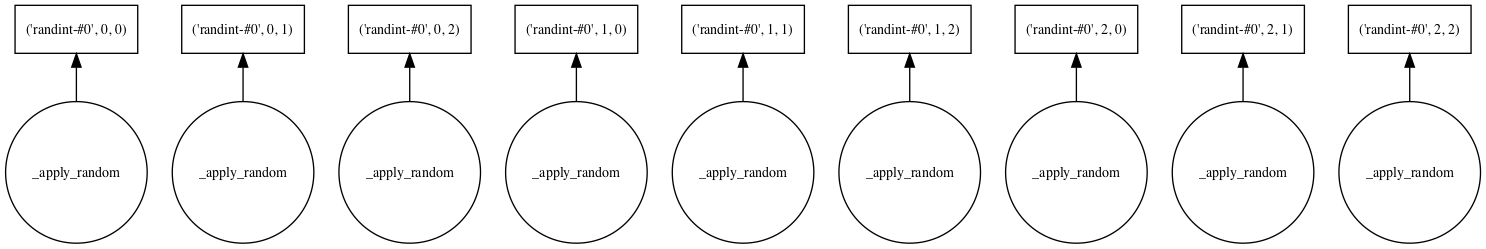

In [33]:
a.visualize() # a = randint(size=(60,60), chunks=(20,20))

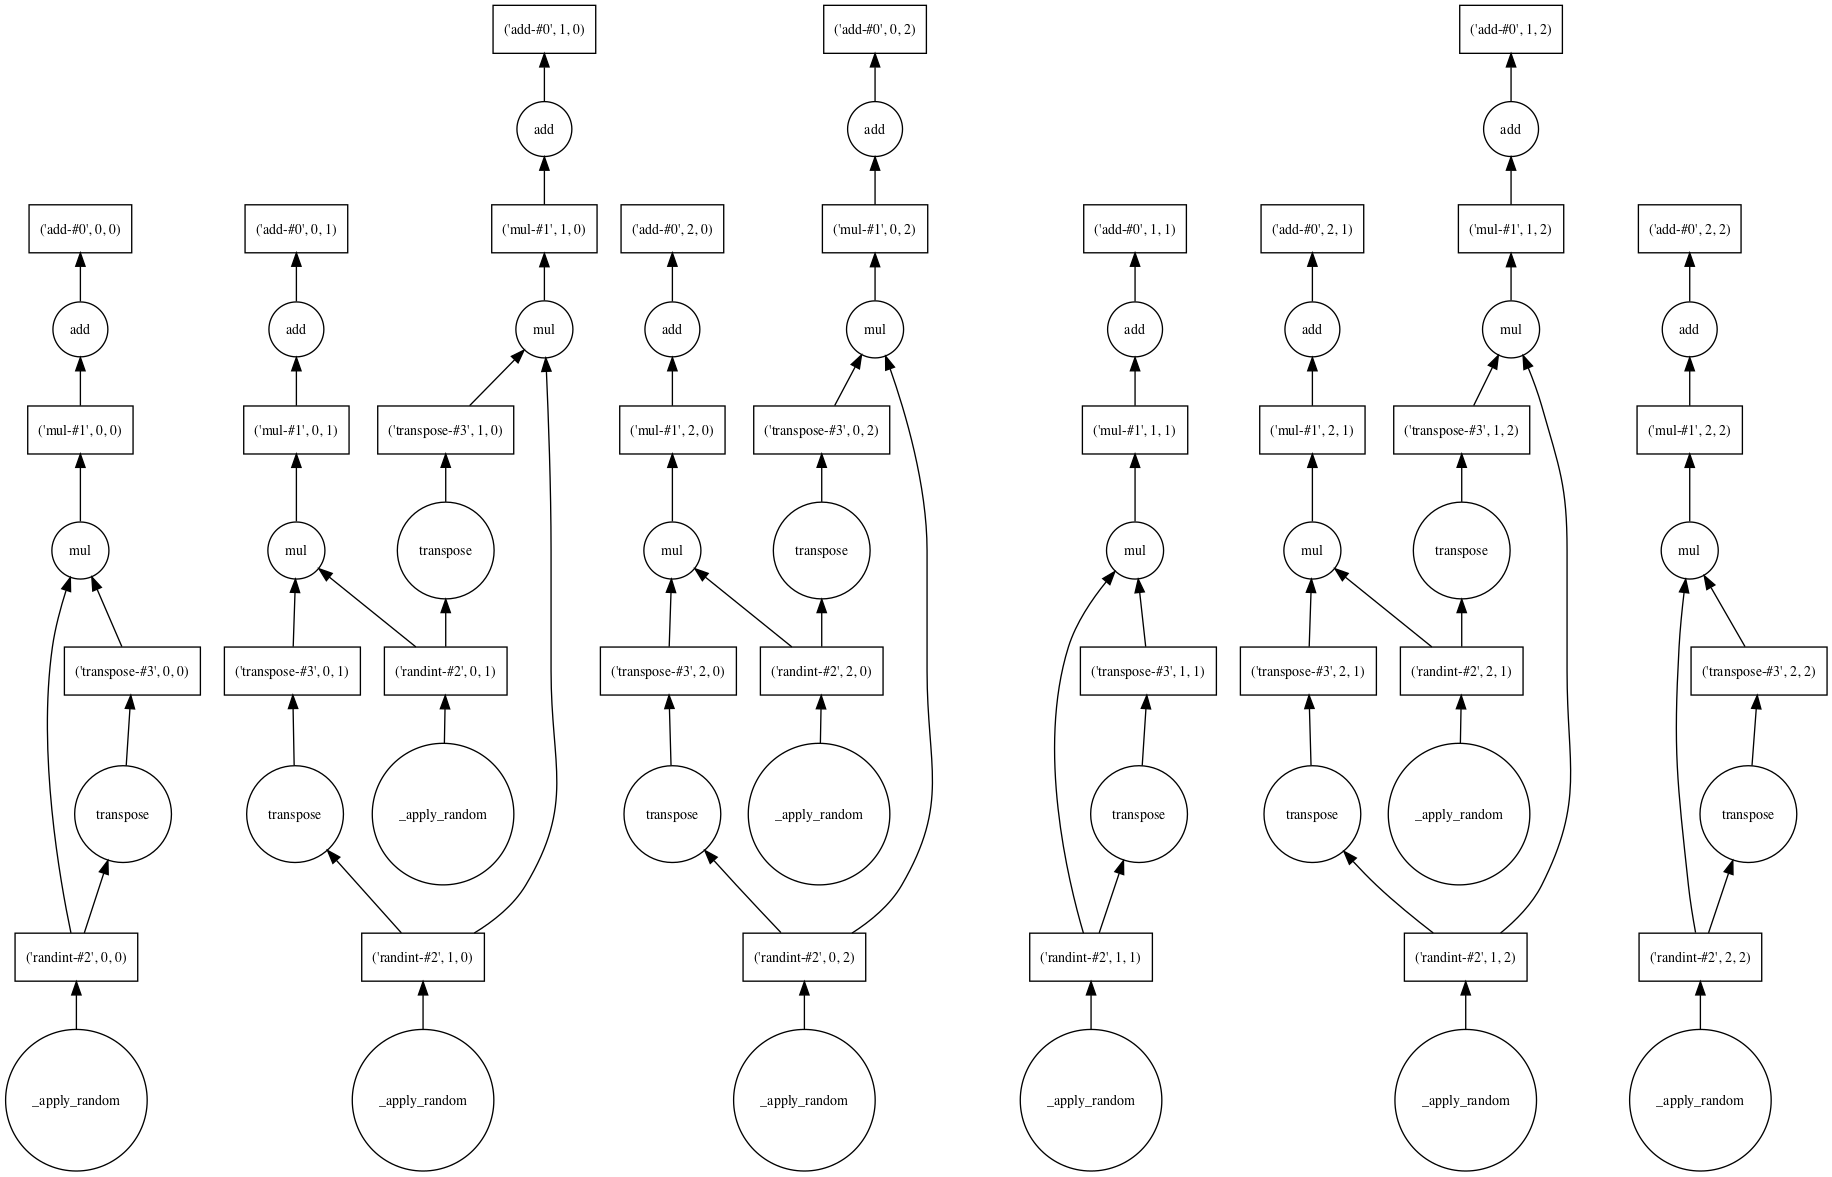

In [34]:
b.visualize() # b = a.T * a + 100

## Ex 1.4 Dask DataFrame
If you're familiar with the `pandas.dataframe` then the `dask.dataframe` is going to be easy to use

In [37]:
import pandas as pd
pd.options.display.max_rows = 10

In [38]:
pdf = pd.read_csv("./data/nycflights/1990.csv")

In [39]:
pdf

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271534,1990,12,27,4,1645.0,1535,2001.0,1759,DL,223,...,NaN,122.0,70.0,LGA,ATL,761.0,NaN,NaN,0,0
271535,1990,12,28,5,1934.0,1535,2205.0,1759,DL,223,...,NaN,246.0,239.0,LGA,ATL,761.0,NaN,NaN,0,0
271536,1990,12,29,6,1557.0,1535,1931.0,1759,DL,223,...,NaN,92.0,22.0,LGA,ATL,761.0,NaN,NaN,0,0
271537,1990,12,30,7,1548.0,1535,1832.0,1759,DL,223,...,NaN,33.0,13.0,LGA,ATL,761.0,NaN,NaN,0,0


In [40]:
# may need to fix slashes in file path if you're on Windows
import dask.dataframe as dd
df = dd.read_csv("./data/nycflights/*.csv")

In [41]:
# Mac and Linux only
!wc -l ./data/nycflights/*.csv

  271540 ./data/nycflights/1990.csv
  258275 ./data/nycflights/1991.csv
  262567 ./data/nycflights/1992.csv
  258880 ./data/nycflights/1993.csv
  261749 ./data/nycflights/1994.csv
  255005 ./data/nycflights/1995.csv
  259515 ./data/nycflights/1996.csv
  257937 ./data/nycflights/1997.csv
  257252 ./data/nycflights/1998.csv
  269182 ./data/nycflights/1999.csv
 2611902 total


In [42]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


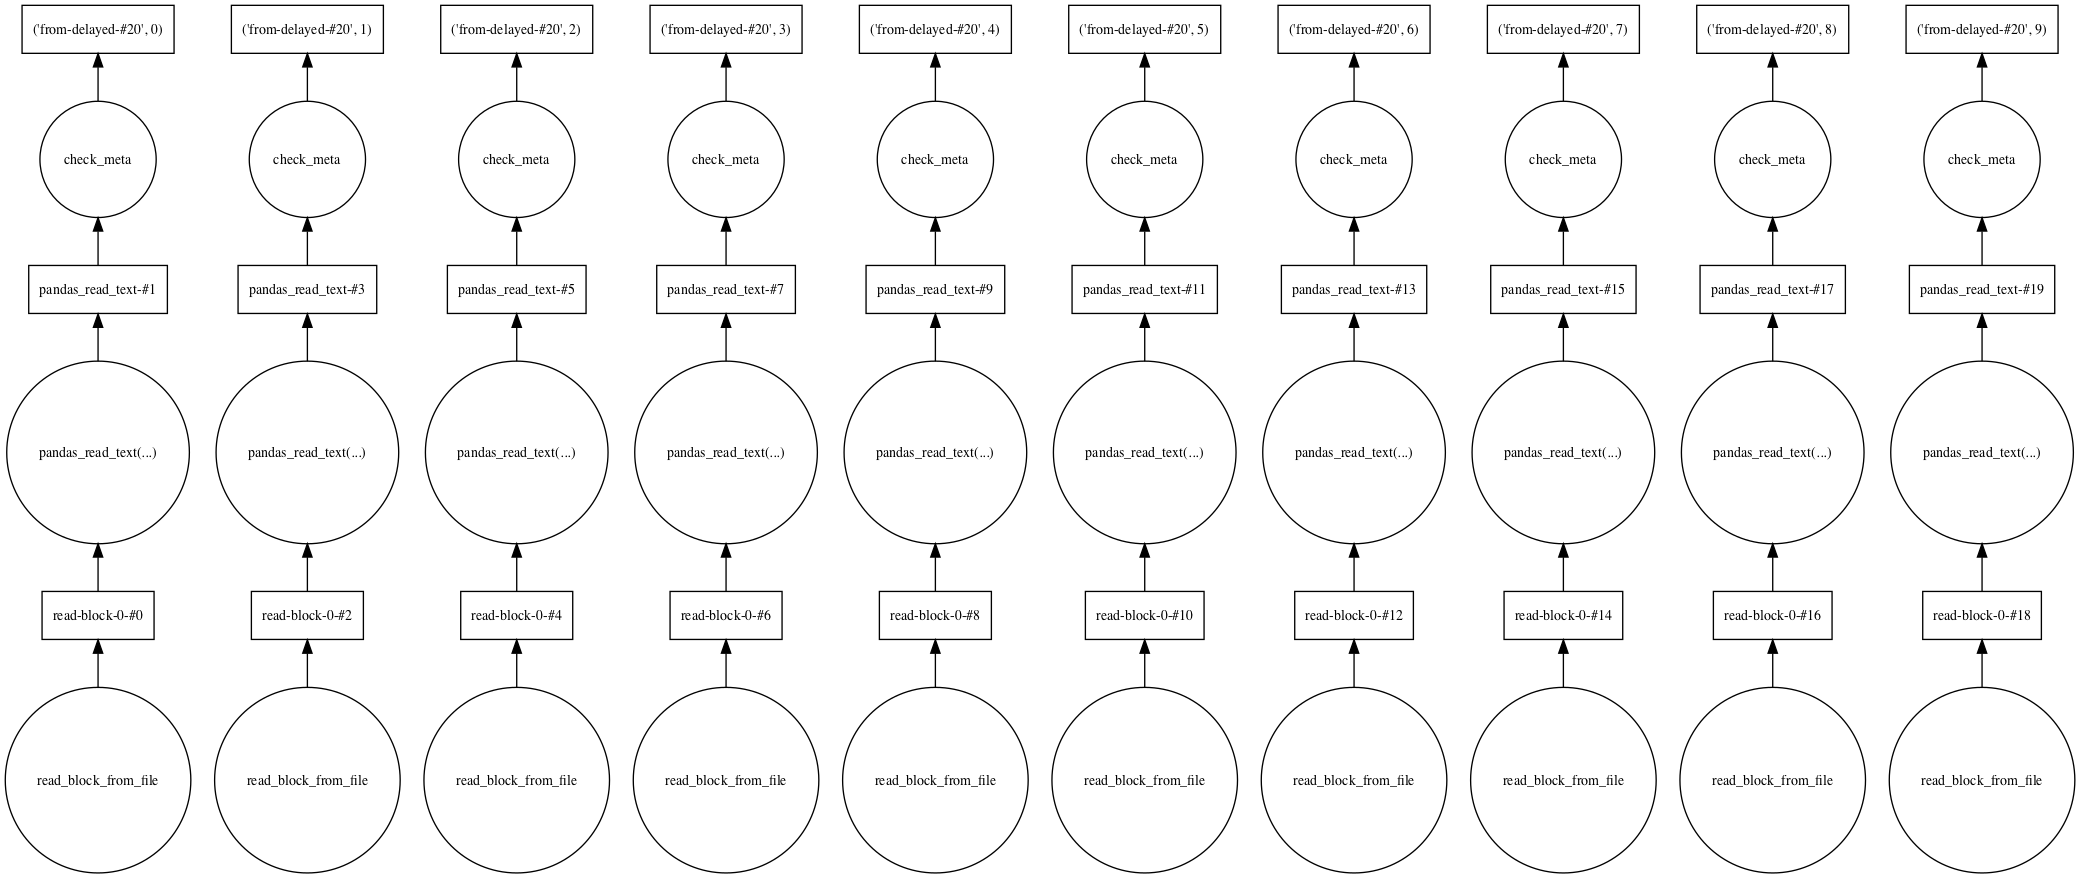

In [43]:
df.visualize()

## Ex 1.5 DataFrame columns

We need to read in our `dask.dataframe` again and this time we're going to do 2 extra things:

* create a `Date` column through the `parse_dates` parameter, using the first 3 columns.
* provide type hints, since type inferrence is based off the first part of the first `pandas.datafram` and these may not be correct, leading to later typing errors.

In [50]:
import os.path

In [51]:
df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

In [52]:
df.columns

Index(['Date', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted'],
      dtype='object')

In [54]:
df.Date

Dask Series Structure:
npartitions=10
    datetime64[ns]
               ...
         ...      
               ...
               ...
Name: Date, dtype: datetime64[ns]
Dask Name: getitem, 40 tasks

In [55]:
df.Origin.unique().compute()

0    EWR
1    LGA
2    JFK
Name: Origin, dtype: object

In [56]:
len(df)

2611892

## Ex 1.6 Dataframe methods

In [57]:
df.ArrDelay.mean()

dd.Scalar<series-..., dtype=float64>

In [58]:
df.ArrDelay.mean().compute()

8.012850468211875

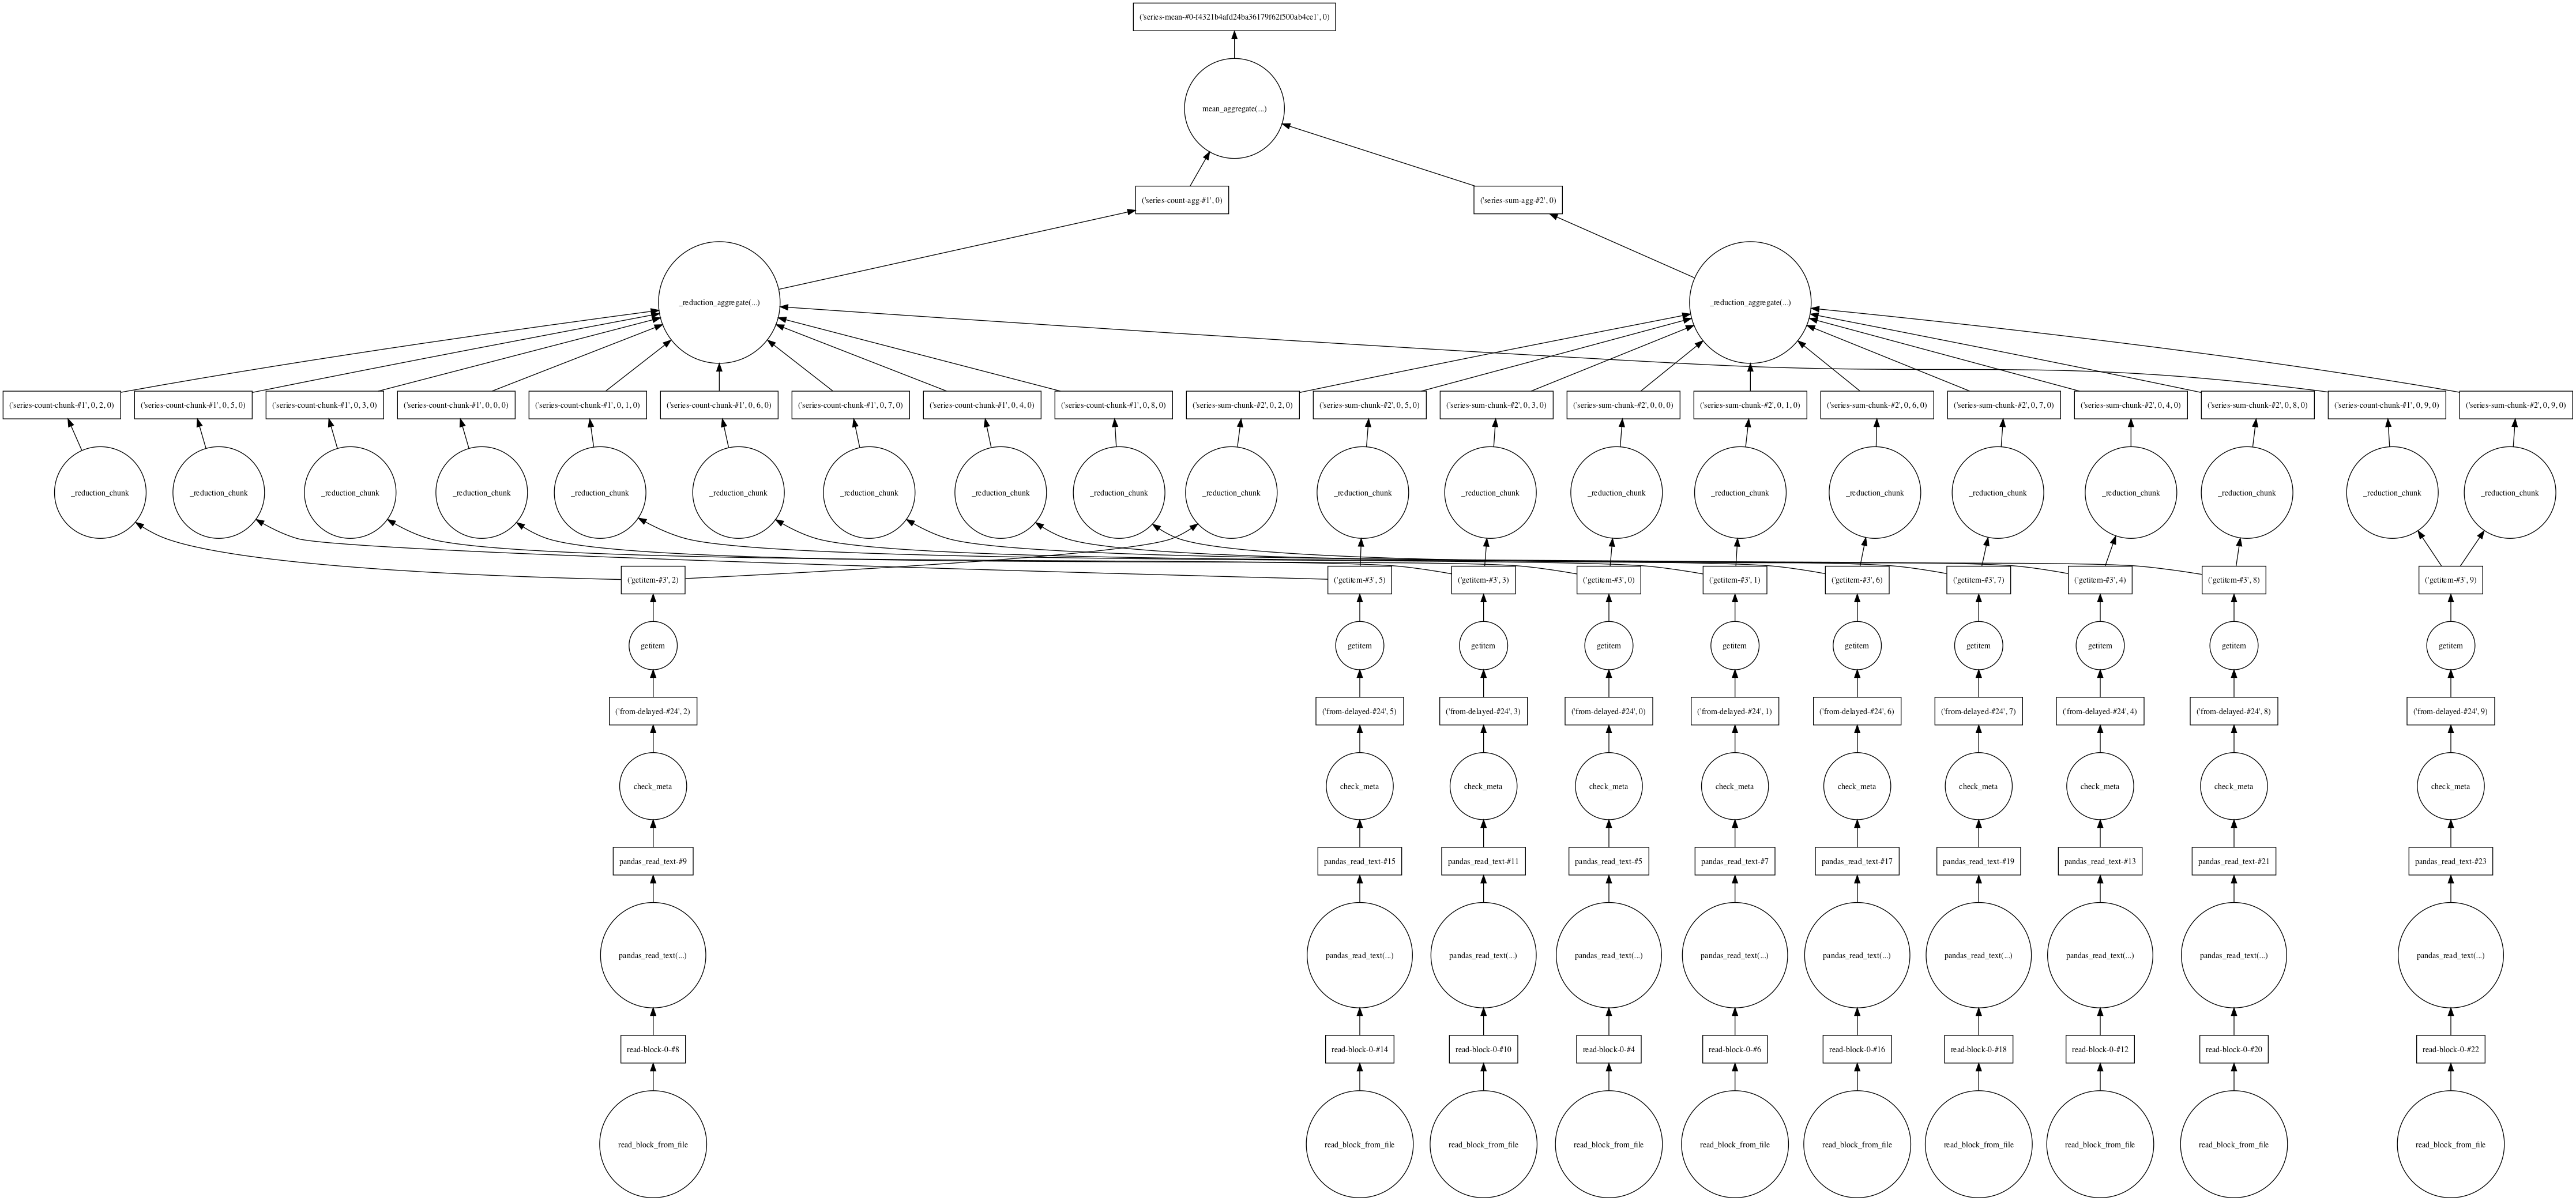

In [59]:
df.ArrDelay.mean().visualize()

## Ex 1.7 Visualize Dataframe Method Task Graphs

Think about what this task graph is telling you about distributed data and distributed data structures

In [62]:
# What is the departure delay for each day of the week?
day_delay = df.groupby("DayOfWeek").DepDelay.mean()

In [63]:
day_delay

Dask Series Structure:
npartitions=1
    float64
        ...
Name: DepDelay, dtype: float64
Dask Name: truediv, 57 tasks

In [64]:
day_delay.compute()

DayOfWeek
1     8.096565
2     8.149109
3     9.141912
4    10.538275
5    11.476687
6     7.824071
7     8.994296
Name: DepDelay, dtype: float64

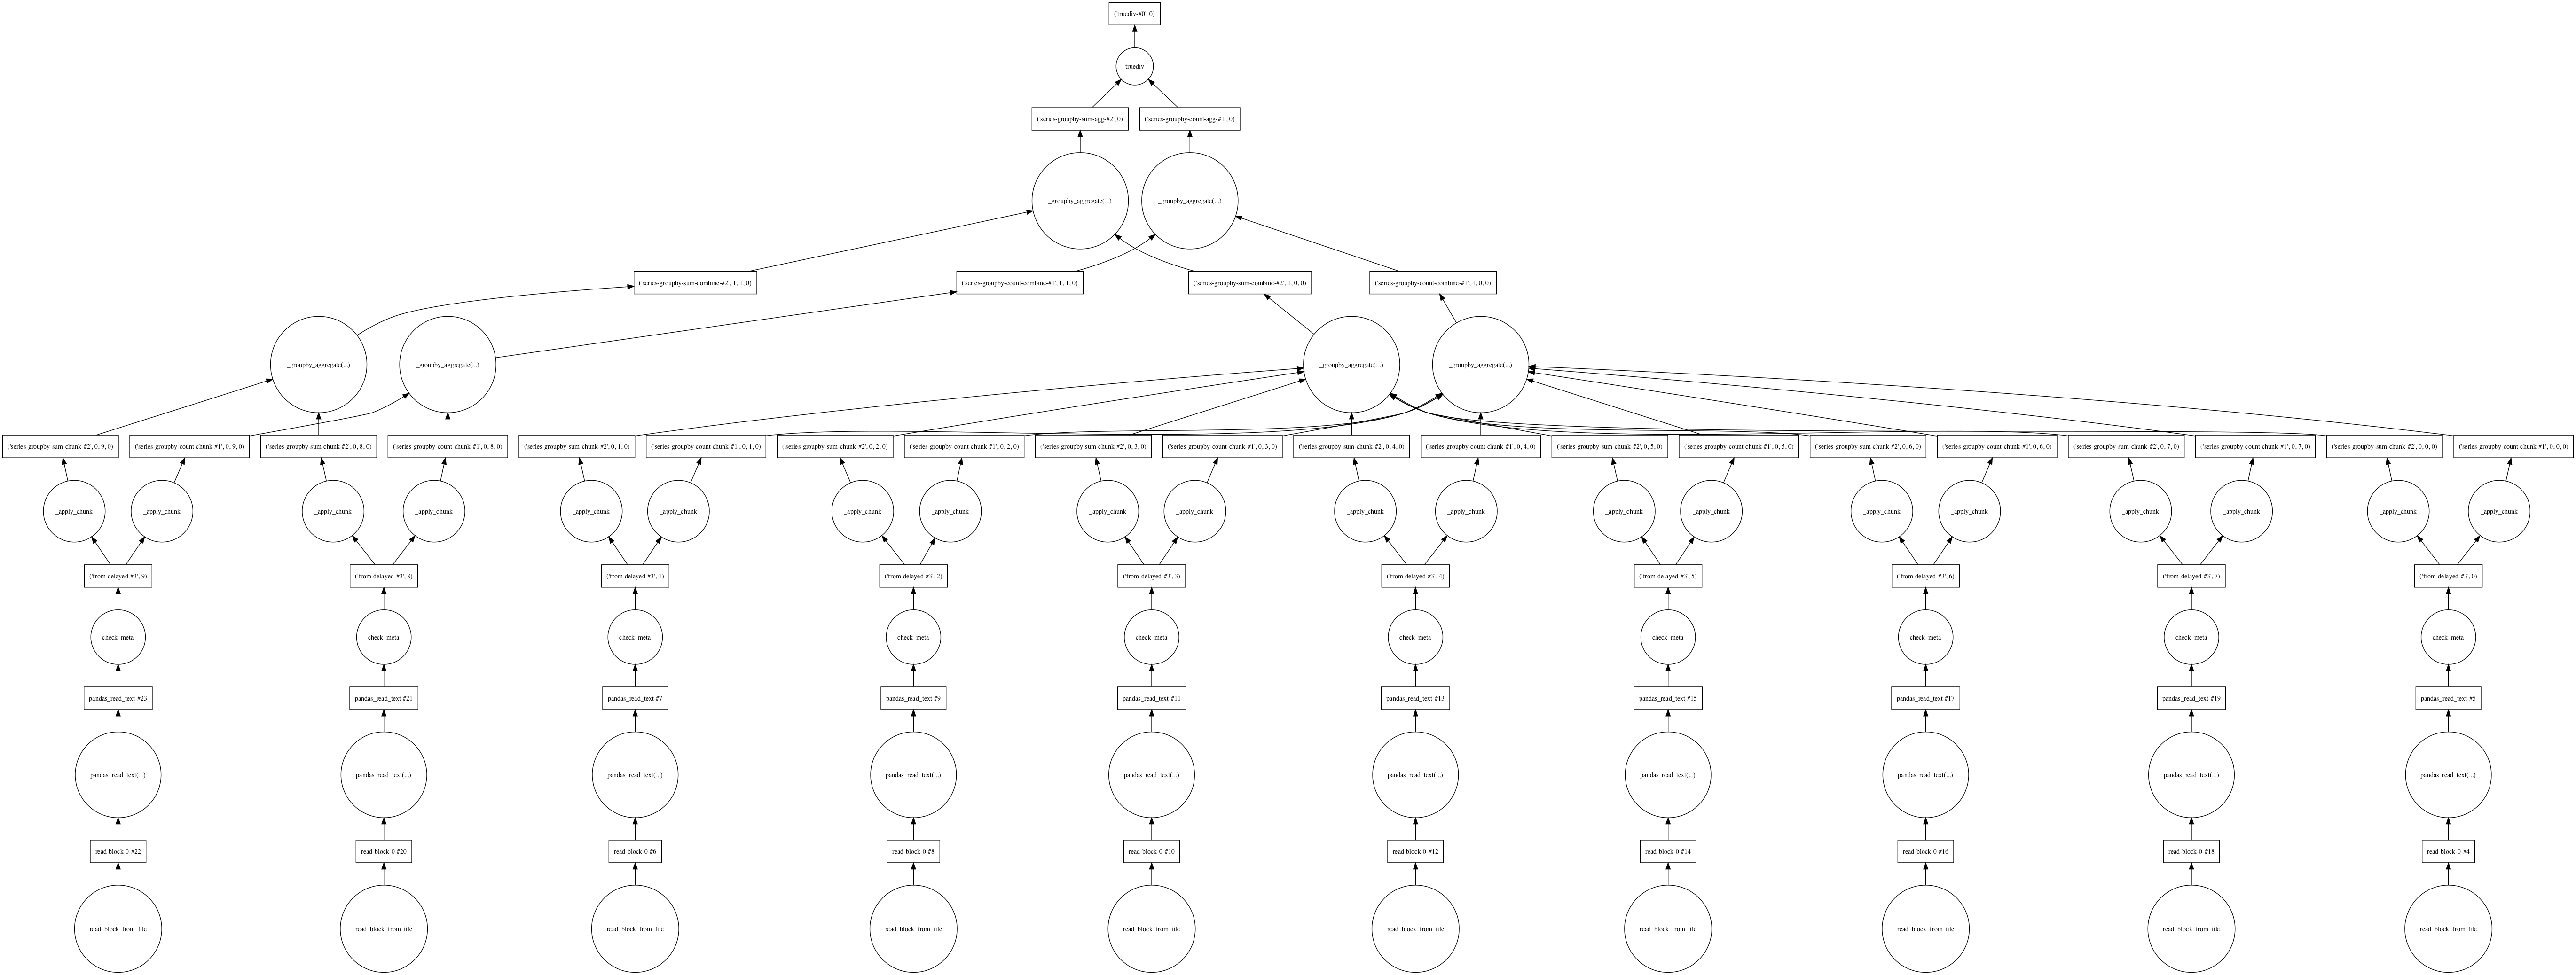

In [68]:
day_delay.visualize()